In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
# Load in the clean zip data in a dataframe
Zip_Confirmed = pd.read_csv('./Data Output/Zip_Confirmed.csv') 
Zip_Confirmed = pd.DataFrame(Zip_Confirmed)
Zip_Confirmed

,zip,confirmed_cases
0,60616,92
1,60069,11
2,60401,18
3,60046,33
4,60192,7
...,...,...
317,62258,7
318,60443,101
319,61282,6
320,60641,76


In [98]:
# Load in the clean zip data in a dataframe
City_Data = pd.read_csv('./Input Data/uszips.csv') 
City_Data = pd.DataFrame(City_Data)
City_Data

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,99923,55.97796,-130.03671,Hyder,AK,Alaska,True,NaN,15,2.1,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33095,99925,55.55767,-132.97627,Klawock,AK,Alaska,True,NaN,927,5.7,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33096,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1635,4.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33097,99927,56.25100,-133.37571,Point Baker,AK,Alaska,True,NaN,38,0.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka


In [99]:
# Merge in cities on zip 
Zip_City = Zip_Confirmed.merge(City_Data, left_on='zip', right_on='zip')
Zip_City

,zip,confirmed_cases,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,60616,92,41.84522,-87.62721,Chicago,IL,Illinois,True,NaN,54464,4677.4,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
1,60069,11,42.19761,-87.92610,Lincolnshire,IL,Illinois,True,NaN,8186,476.0,17097,Lake,{'17097':100},Lake,17097,False,False,America/Chicago
2,60401,18,41.34396,-87.61374,Beecher,IL,Illinois,True,NaN,7779,53.0,17197,Will,"{'17091':1.32,'17197':98.68}",Will|Kankakee,17197|17091,False,False,America/Chicago
3,60046,33,42.41609,-88.06042,Lake Villa,IL,Illinois,True,NaN,35286,591.7,17097,Lake,{'17097':100},Lake,17097,False,False,America/Chicago
4,60192,7,42.07370,-88.18223,Hoffman Estates,IL,Illinois,True,NaN,15650,599.0,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,62258,7,38.46213,-89.77254,Mascoutah,IL,Illinois,True,NaN,9253,48.3,17163,St. Clair,{'17163':100},St. Clair,17163,False,False,America/Chicago
316,60443,101,41.50372,-87.74683,Matteson,IL,Illinois,True,NaN,21554,706.1,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
317,61282,6,41.49557,-90.41302,Silvis,IL,Illinois,True,NaN,7820,906.3,17161,Rock Island,{'17161':100},Rock Island,17161,False,False,America/Chicago
318,60641,76,41.94659,-87.74676,Chicago,IL,Illinois,True,NaN,71023,6845.9,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago


In [100]:
# See which zip codes have the most confirmed case
result = Zip_City.sort_values(['confirmed_cases'], ascending=False)
result


,zip,confirmed_cases,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
145,60645,272,42.00853,-87.69481,Chicago,IL,Illinois,True,NaN,47732,7743.1,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
166,60620,269,41.74080,-87.65250,Chicago,IL,Illinois,True,NaN,68096,3935.6,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
123,60619,238,41.74373,-87.60549,Chicago,IL,Illinois,True,NaN,61258,4092.5,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
84,60628,229,41.69182,-87.61797,Chicago,IL,Illinois,True,NaN,66724,2553.0,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
214,60617,209,41.71591,-87.55431,Chicago,IL,Illinois,True,NaN,82534,2345.8,17031,Cook,{'17031':100},Cook,17031,False,False,America/Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,62959,6,37.71804,-88.90775,Marion,IL,Illinois,True,NaN,28201,76.9,17199,Williamson,{'17199':100},Williamson,17199,False,False,America/Chicago
36,60143,6,41.97306,-88.02155,Itasca,IL,Illinois,True,NaN,10996,581.3,17043,DuPage,{'17043':100},DuPage,17043,False,False,America/Chicago
224,60551,6,41.52538,-88.68472,Sheridan,IL,Illinois,True,NaN,5500,33.9,17099,LaSalle,{'17099':100},LaSalle,17099,False,False,America/Chicago
296,60964,6,41.03550,-87.73825,Saint Anne,IL,Illinois,True,NaN,5070,25.6,17091,Kankakee,"{'17075':6.92,'17091':93.08}",Kankakee|Iroquois,17091|17075,False,False,America/Chicago


In [124]:
# Load in the clean gender data in a dataframe
Zip_Gender = pd.read_csv('./Data Output/Zip_Gender.csv') 
Zip_Gender = pd.DataFrame(Zip_Gender)
Zip_Gender

,zip,Male,Female,Unknown/Left Blank
0,60616,47.0,45.0,0.0
1,60069,8.0,0.0,0.0
2,60401,8.0,10.0,0.0
3,60046,19.0,14.0,0.0
4,60192,0.0,6.0,0.0
...,...,...,...,...
317,62258,0.0,0.0,0.0
318,60443,45.0,56.0,0.0
319,61282,0.0,0.0,0.0
320,60641,42.0,33.0,0.0


In [125]:
# Sum of the count by Gender
Zip_Gender = Zip_Gender[['Male','Female','Unknown/Left Blank']]
Zip_Gender = Zip_Gender.apply(pd.to_numeric, errors='coerce').sum()

# Add the column names of Gender and Count to the series
Zip_Gender = pd.DataFrame({'Gender':Zip_Gender.index, 'gender_count':Zip_Gender.values})
Zip_Gender.head()



,Gender,gender_count
0,Male,6666.0
1,Female,6895.0
2,Unknown/Left Blank,0.0


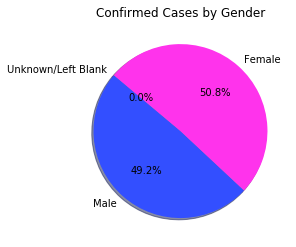

In [285]:
# Create a Pie chart of the Zip Gender Data Frame

Gender = Zip_Gender['Gender']
Gender_Count = Zip_Gender['gender_count']

colors = ["#334FFF","#FF33EC"]

plt.pie(Gender_Count, labels=Gender,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Confirmed Cases by Gender')
plt.savefig('./Chart Images/Confirmed Cases by Gender.png')
plt.show(block=False)

In [265]:
# Load in the clean race demographics data in a dataframe
Zip_Race = pd.read_csv('./Data Output/Zip_Race.csv') 
Zip_Race = pd.DataFrame(Zip_Race)
Zip_Race

,White,Black,Left Blank,Other,Asian,Hispanic,NH/PI*,AI/AN**
0,6.0,46.0,26.0,0.0,12.0,0.0,0.0,0.0
1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
3,18.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.0,79.0,13.0,0.0,0.0,0.0,0.0,0.0
319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,18.0,0.0,27.0,0.0,0.0,21.0,0.0,0.0


In [266]:
# Sum of the count by Gender
Zip_Race = Zip_Race.apply(pd.to_numeric, errors='coerce').sum()

# Add the column names of Race and Count to the series
Zip_Race = pd.DataFrame({'Race':Zip_Race.index, 'race_count':Zip_Race.values})
Zip_Race

,Race,race_count
0,White,3392.0
1,Black,3807.0
2,Left Blank,3122.0
3,Other,424.0
4,Asian,210.0
5,Hispanic,1231.0
6,NH/PI*,0.0
7,AI/AN**,0.0


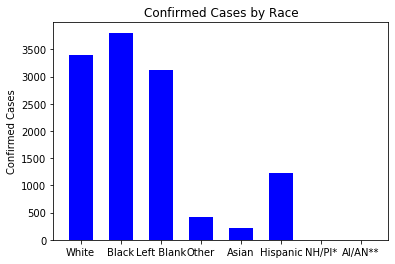

In [283]:
# Create a bar chart of the Race Data Frame

Race = Zip_Race['Race']
Race_Count = Zip_Race['race_count']

plt.bar(Race, Race_Count, width=.6, color="b", align="center")
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases by Race')
plt.savefig('./Chart Images/Confirmed Cases by Race.png')

In [275]:
# Load in the clean age demographics data in a dataframe
Zip_Age = pd.read_csv('./Data Output/Zip_Age.csv') 
Zip_Age = pd.DataFrame(Zip_Age)
Zip_Age

,zip,Unknown,<20,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,60616,0.0,0.0,0.0,19.0,16.0,19.0,21.0,8.0,0.0
1,60069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60401,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,60046,0.0,0.0,0.0,6.0,0.0,10.0,0.0,0.0,0.0
4,60192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
317,62258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,60443,0.0,0.0,10.0,17.0,21.0,11.0,18.0,15.0,6.0
319,61282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,60641,0.0,0.0,9.0,19.0,18.0,9.0,14.0,0.0,0.0


In [276]:
# Sum of the count by age
Zip_Age = Zip_Age[['Unknown','<20','20-29','30-39','40-49','50-59','60-69','70-79','80+']]
Zip_Age = Zip_Age.apply(pd.to_numeric, errors='coerce').sum()
#print(type(Zip_Age))

# Add the column names of Age and Count to the series
Zip_Age = pd.DataFrame({'Age':Zip_Age.index, 'age_count':Zip_Age.values})
Zip_Age

,Age,age_count
0,Unknown,0.0
1,<20,56.0
2,20-29,1223.0
3,30-39,1746.0
4,40-49,2165.0
5,50-59,2438.0
6,60-69,1775.0
7,70-79,932.0
8,80+,591.0


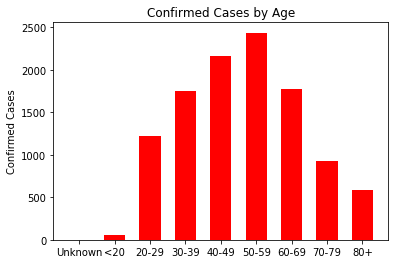

In [284]:
# Create a bar chart of the Age Data 

Age = Zip_Age['Age']
Age_Count = Zip_Age['age_count']

plt.bar(Age, Age_Count, width=.6, color="r", align="center")
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases by Age')
plt.savefig('./Chart Images/Confirmed Cases by Age.png')